In [1]:
from experiment.scenario import *
from pathlib import Path
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from experiment.utils import scan_freq_from_pulse_freq_via_point_spacing, point_spacing_along, point_spacing_across, rms

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Experiment Test Case with Random Error

**Update: Independent ALS simulation and random error introduction**

Updated folder structure:

- 01_input
- 02_settings
- 03_scene
- 04_survey
- 05_point_clouds
- 06_reconstruction
- 07_evaluation

One settings dictionary vs. two settings dictionaries?

One dictionary:

- Explicitly states the survey settings (mainly pulse frequency) for each scenario, even if they repeat
- Requires parsing of the contained survey settings to ensure that surveys with identical settings are only simulated once
- Allows identification of each scenario's settings at a single glance, without referencing settings from a second dictionary
- More verbose, but simpler structure

Two dictionaries:

- No need to repeat identical pulse frequencies for multiple scenarios, instead add reference to corresponding survey setting
- No need to parse the scenario dictionary to identify unique survey settings
- To get complete settings for single scenario including its survey settings, the reference to the second dictionary must be dissolved
- Less verbose, but more complicated structure for the user to set up


In [2]:
from experiment_setup.exp_random_error import *

In [3]:
print("rubbish")

rubbish


In [ ]:
# for i, s in enumerate(scenario_settings):
#     print(i)
#     print(point_spacing_along(velocity, s["scan_freq_hz"]))
#     print(point_spacing_across(altitude, scan_angle_deg, s["pulse_freq_hz"], s["scan_freq_hz"]))
#     print()

## Reconstruction

In [ ]:
e.setup()

In [ ]:
e.run_steps(Scenario.setup_reconstruction, scenarios="scenario_005")

In [ ]:
e.run_steps(Scenario.prepare_reconstruction, scenarios="scenario_005")

In [ ]:
e.run_steps(Scenario.run_reconstruction, scenarios="scenario_005")

## Evaluation

In [4]:
e.setup()
e.run_steps(Scenario.setup_evaluation)

Saving experiment configuration ...
Saving scenario configurations ...

Running 'setup_evaluation' for scenario_000 ...

Finished 'setup_evaluation' for scenario_000 after 0:00:00.021481.

Running 'setup_evaluation' for scenario_001 ...

Finished 'setup_evaluation' for scenario_001 after 0:00:00.016541.

Running 'setup_evaluation' for scenario_002 ...

Finished 'setup_evaluation' for scenario_002 after 0:00:00.018048.

Running 'setup_evaluation' for scenario_003 ...

Finished 'setup_evaluation' for scenario_003 after 0:00:00.013047.

Running 'setup_evaluation' for scenario_004 ...

Finished 'setup_evaluation' for scenario_004 after 0:00:00.013316.

Running 'setup_evaluation' for scenario_005 ...

Finished 'setup_evaluation' for scenario_005 after 0:00:00.013571.

Running 'setup_evaluation' for scenario_006 ...

Finished 'setup_evaluation' for scenario_006 after 0:00:00.011515.

Running 'setup_evaluation' for scenario_007 ...

Finished 'setup_evaluation' for scenario_007 after 0:00:00.0

In [5]:
e.run_steps(Scenario.run_evaluation, evaluator_selection="complexity_diff", scenarios="scenario_000")


Running 'run_evaluation' for scenario_000 ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.111465.

Starting ComplexityDifferenceEvaluator ...

Starting ComplexityEvaluator ...
Counting faces for LOD 1.2 ...


KeyError: '1.2'

In [6]:
e[0].evaluators["complexity_diff"].evaluator_2.run()


Starting ComplexityEvaluator ...
Counting faces for LOD 1.2 ...


KeyError: '1.2'

In [ ]:
e.compute_summary_statistics()

In [ ]:
e.run_steps(Scenario.concat_evaluation_results)

## Full Cycle

In [ ]:
e.setup()

In [ ]:
e.run_steps(Scenario.setup_survey)

In [ ]:
scenarios_unique_surveys = [f"scenario_{(i*5):03}" for i in range(5)]
print(scenarios_unique_surveys[:3])
# scenarios_unique_surveys = None

In [ ]:
e.run_steps(Scenario.prepare_survey, scenarios=scenarios_unique_surveys)

In [ ]:
e.run_steps(Scenario.run_survey, scenarios=scenarios_unique_surveys)

In [ ]:
import shutil
for i in [j*5 for j in range(5)]:
    print(i)
    merged_cloud_textfile_filepath = e.scenarios[f"scenario_{i:03}"].textfile_merged_cloud_path_filepath
    for k in range(1, 5):
        print(f" {i+k}")
        shutil.copy2(merged_cloud_textfile_filepath, e.scenarios[f"scenario_{(i+k):03}"].textfile_merged_cloud_path_filepath)

In [ ]:
e.run_steps(Scenario.process_point_cloud)

In [ ]:
e.run_steps(Scenario.setup_reconstruction)

In [ ]:
e.run_steps(Scenario.prepare_reconstruction)

In [ ]:
e.run_steps(Scenario.run_reconstruction)

In [ ]:
e.run_steps(Scenario.setup_evaluation)

In [ ]:
list(e.scenarios.keys())[-1:]

In [ ]:
e.run_steps(Scenario.run_evaluation)

In [ ]:
e.compute_summary_statistics()

In [ ]:
for name, s in e.scenarios.items():
    s.concat_evaluation_results()

In [ ]:
e.setup_input_evaluation()

In [ ]:
e.run_input_evaluation()

## Graphical evaluation: Results from Evaluator.summary_stats()

In [3]:
e.setup()

Saving experiment configuration ...
Saving scenario configurations ...


In [4]:
e.run_steps(Scenario.setup_evaluation)


Running 'setup_evaluation' for scenario_000 ...

Finished 'setup_evaluation' for scenario_000 after 0:00:00.014518.

Running 'setup_evaluation' for scenario_001 ...

Finished 'setup_evaluation' for scenario_001 after 0:00:00.014572.

Running 'setup_evaluation' for scenario_002 ...

Finished 'setup_evaluation' for scenario_002 after 0:00:00.013531.

Running 'setup_evaluation' for scenario_003 ...

Finished 'setup_evaluation' for scenario_003 after 0:00:00.011520.

Running 'setup_evaluation' for scenario_004 ...

Finished 'setup_evaluation' for scenario_004 after 0:00:00.015054.

Running 'setup_evaluation' for scenario_005 ...

Finished 'setup_evaluation' for scenario_005 after 0:00:00.015551.

Running 'setup_evaluation' for scenario_006 ...

Finished 'setup_evaluation' for scenario_006 after 0:00:00.017046.

Running 'setup_evaluation' for scenario_007 ...

Finished 'setup_evaluation' for scenario_007 after 0:00:00.016039.

Running 'setup_evaluation' for scenario_008 ...

Finished 'setu

In [ ]:
e.run_steps(Scenario.run_evaluation, evaluator_selection="hausdorff")

In [24]:
e.compute_summary_statistics()

Computing summary statistics from all scenarios ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.147986.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.039524.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.032040.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.030235.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.041510.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.044051.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.044275.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.032925.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.031501.

Starting Ge

In [26]:
e.summary_stats.loc["scenario_000", "hausdorff_22_rms"]

1.340724415469584

In [7]:
axis_labels = {
    "iou_22_mean": "Mean IOU 22",
    "hausdorff_22_rms": "RMS Hausdorff Distance 22 [m]",
    "h_70p_mean_abs_diff": "Mean height difference\n($70^{th}$ %ile, abs. val) [m]",
    "h_70p_mean_norm_abs_diff": "Mean normalized height difference\n($70^{th}$ %ile, abs. val) [m]",
    "area_22_mean_abs_diff": "Mean area difference\n(abs. val.) 22 [m²]",
    "area_22_mean_norm_abs_diff": "Mean normalized area difference\n(abs. val.) 22",
    "volume_22_mean_abs_diff": "Mean volume difference\n(abs.val.) 22 [m³]",
    "volume_22_mean_norm_abs_diff": "Mean normalized volume difference\n(abs. val.) 22",
    "n_faces_22_mean": "Mean face number 22",
    "density_overall": "Point density [m$^{-2}$]",
    "point_spacing_along": "Point spacing [m]"
}

In [8]:
titles = {
    "iou_22_mean": "Mean IOU",
    "hausdorff_22_rms": "RMS Hausdorff Distance [m]",
    "h_70p_mean_abs_diff": "Mean $70^{th}$ %ile height difference [m]",
    "h_70p_mean_norm_abs_diff": "Mean normalized $70^{th}$ %ile height difference",
    "area_22_mean_abs_diff": "Mean area difference [m²]",
    "area_22_mean_norm_abs_diff": "Mean normalized area difference",
    "area_22_norm_mean_abs_diff": "Normalized mean area difference",
    "volume_22_mean_abs_diff": "Mean volume difference [m³]",
    "volume_22_mean_norm_abs_diff": "Mean normalized volume difference",
    "volume_22_norm_mean_abs_diff": "Normalized mean volume difference",
    "n_faces_22_mean": "Mean face number",
    "density_overall": "Point density [m$^{-2}$]",
    "point_spacing_along": "Point spacing [m]"
}

In [9]:
def eval_plot(ax, x, y, error_steps=error_steps, xlabel=True, ylabel=True):
    for i, fraction in enumerate(error_steps):
        std_horizontal_error = float(Decimal(str(fraction)) * Decimal(str(std_horizontal_max)))
        slice = e.summary_stats[e.summary_stats.std_horizontal_error == std_horizontal_error]
        ax.plot(slice[x], slice[y], label=str(int(fraction*100)), marker="o")
    
    if xlabel:
        ax.set_xlabel(axis_labels[x] if x in axis_labels.keys() else x)
    if ylabel:
        ax.set_ylabel(axis_labels[y] if y in axis_labels.keys() else y)

    # if y in ["hausdorff_22_rms", "hausdorff_22_mean", "area_22_mean_abs_diff", "volume_22_mean_abs_diff", "n_faces_22_mean"]:
    if "iou_" not in y:
        ax.set_ylim(bottom=0)
    
    if x in ["point_spacing_along", "point_spacing_across"]:
        ax.xaxis.set_inverted(True)

In [10]:
def eval_plot_multi(xs, ys):
    fig, axs = plt.subplots(nrows=len(ys), ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4*len(ys)))

    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            eval_plot(axs[i,j], x, y)
            if j == 1:
                axs[i,j].legend(title="Noise [% of max]", loc=(1.1, 0))

In [20]:
def eval_plot_row(xs, y, title=False):
    fig, axs = plt.subplots(nrows=1, ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4))

    for j, x in enumerate(xs):
        if len(xs) == 1:
            ax = axs
        else:
            ax = axs[j]
        eval_plot(ax, x, y, ylabel=(not title))
        
        if j == len(xs)-1:
            ax.legend(title="Noise [% of max]", loc=(1.1, 0))
    
    if title:
        fig.suptitle(titles[y] if y in titles.keys() else y)

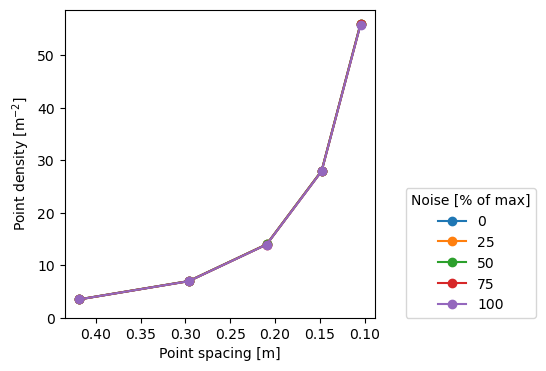

In [31]:
eval_plot_row(["point_spacing_along"], "density_overall")

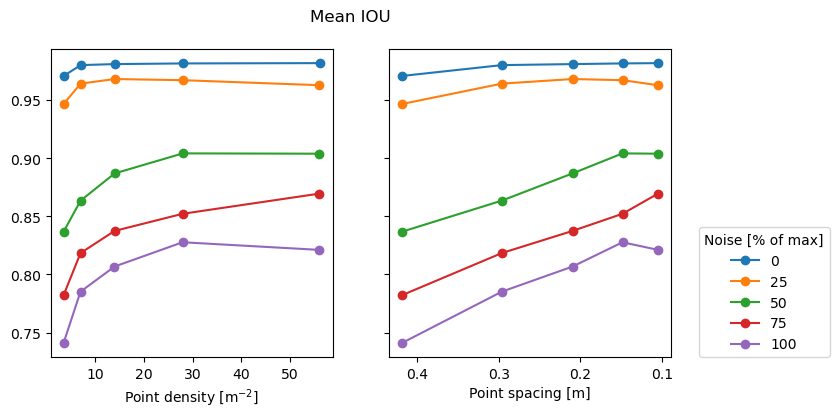

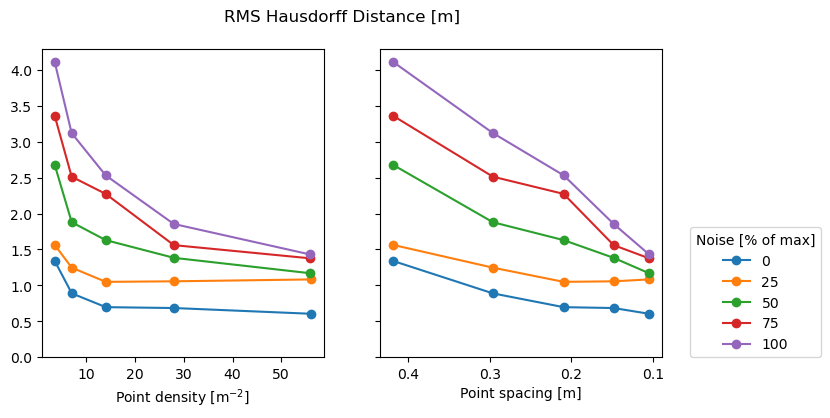

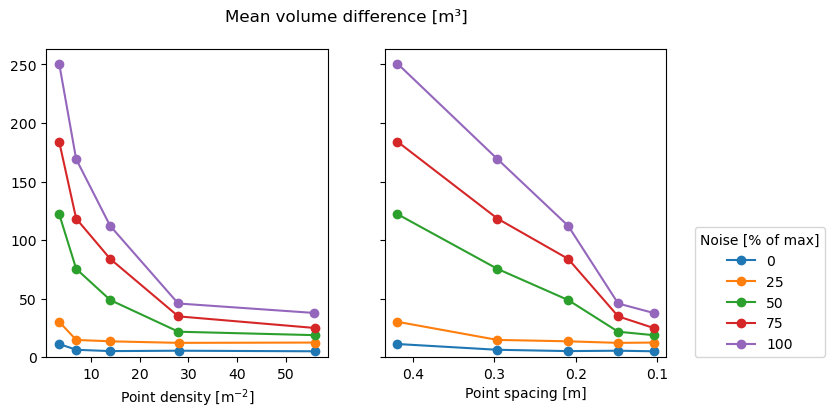

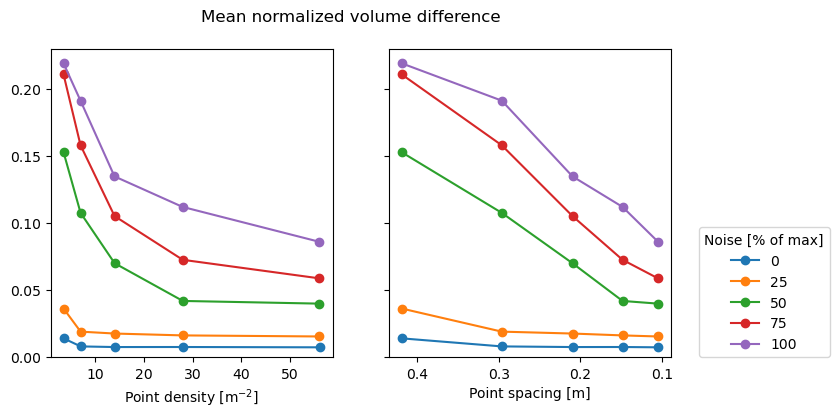

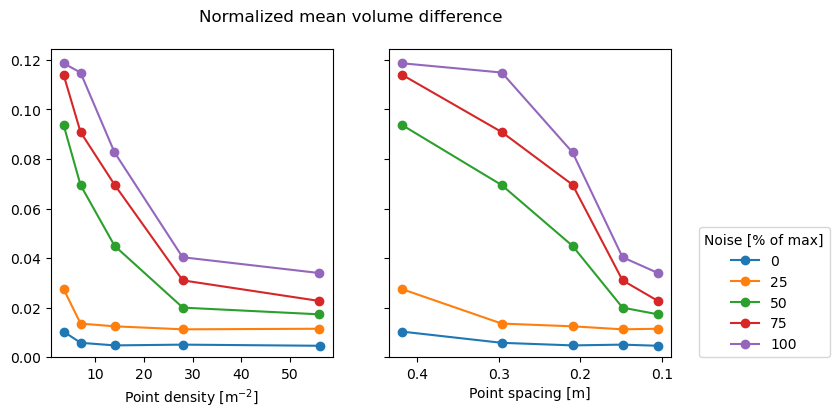

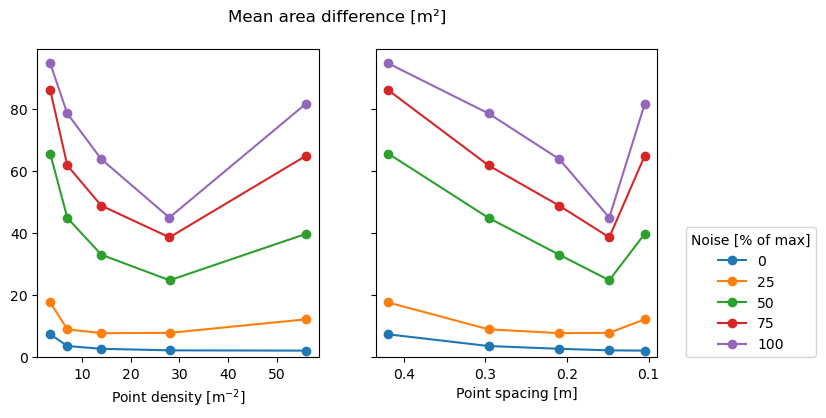

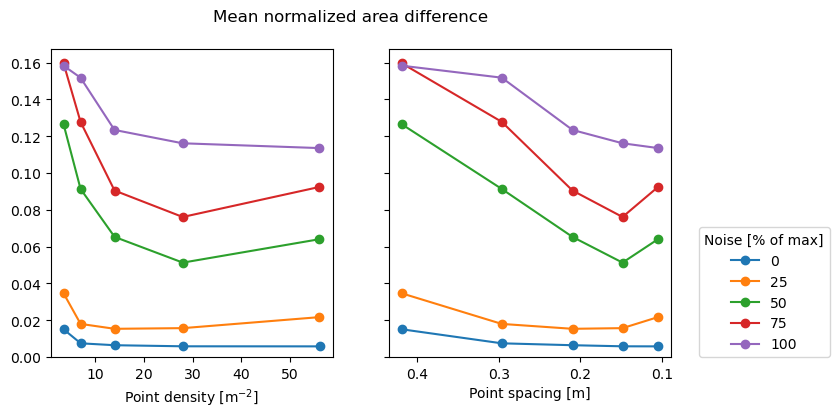

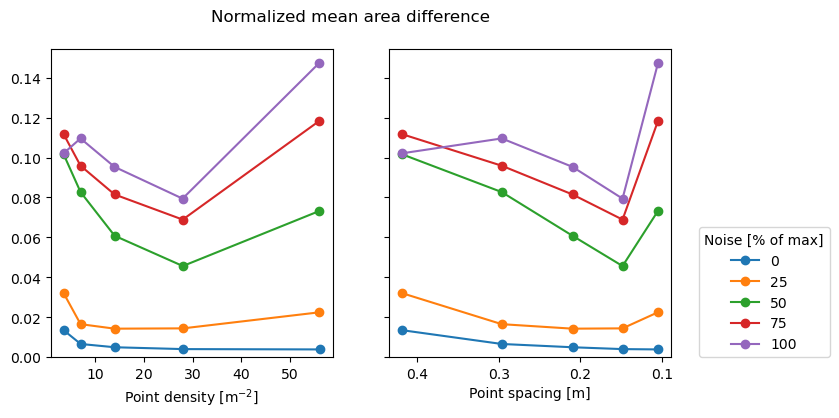

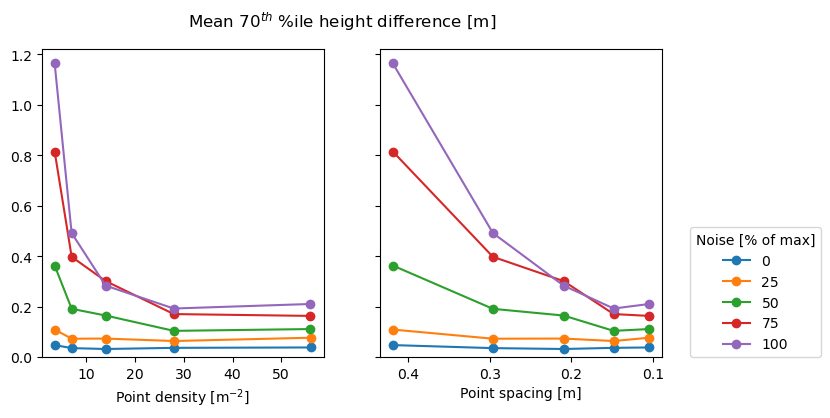

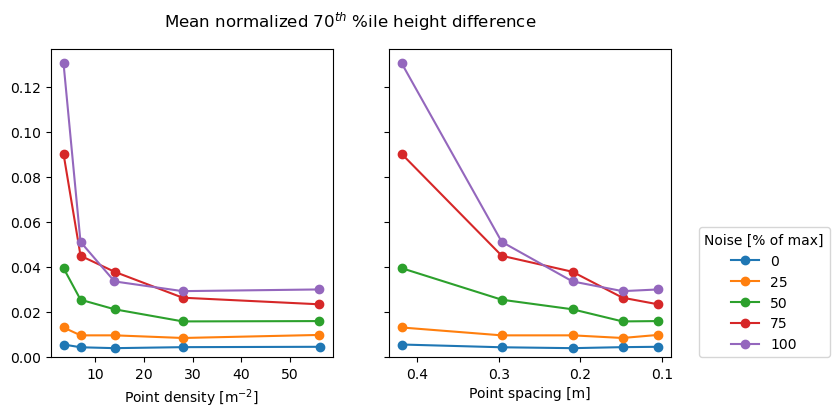

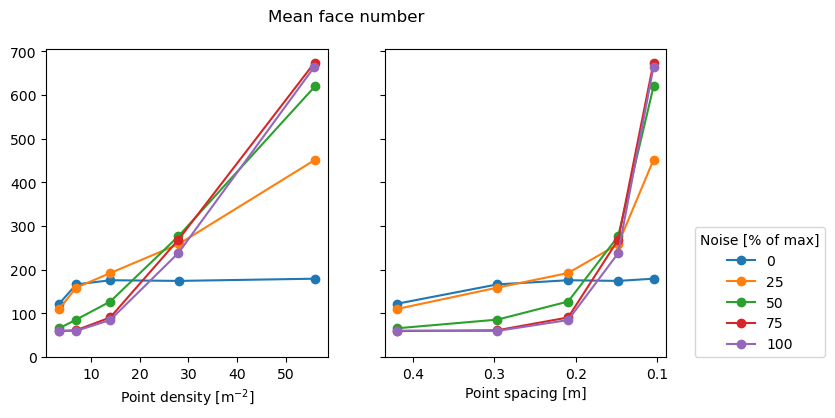

In [28]:
xs = ["density_overall", "point_spacing_along"]
ys = ["iou_22_mean", "hausdorff_22_rms", "volume_22_mean_abs_diff", "volume_22_mean_norm_abs_diff", "volume_22_norm_mean_abs_diff", "area_22_mean_abs_diff", "area_22_mean_norm_abs_diff", "area_22_norm_mean_abs_diff", "h_70p_mean_abs_diff", "h_70p_mean_norm_abs_diff", "n_faces_22_mean"]

# eval_plot_multi(xs, ys)

for y in ys:
    eval_plot_row(xs, y, title=True)

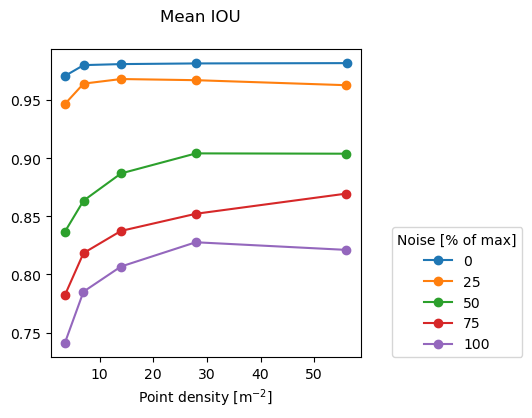

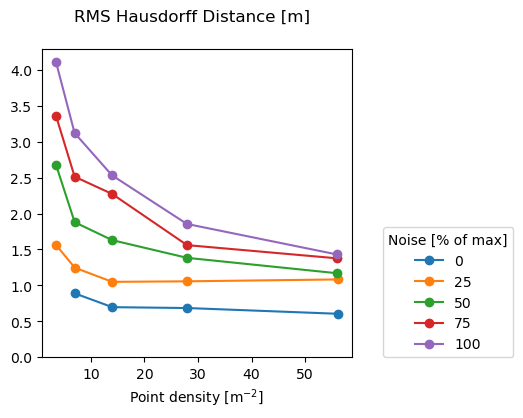

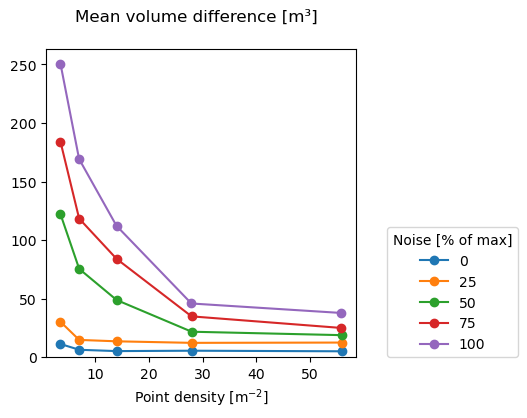

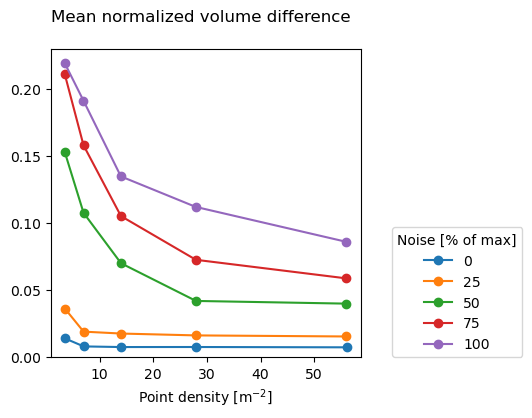

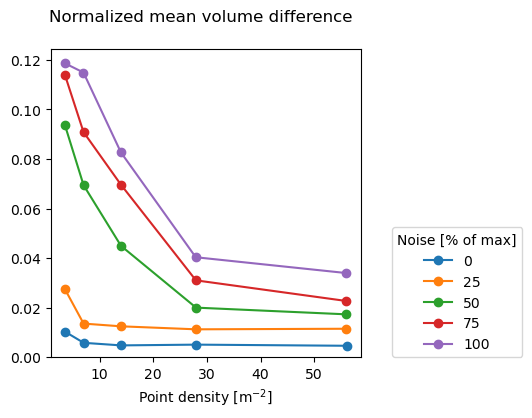

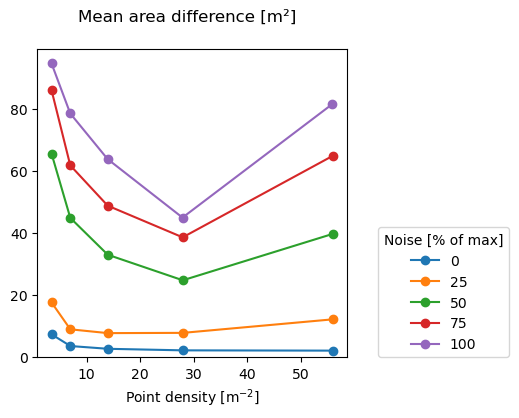

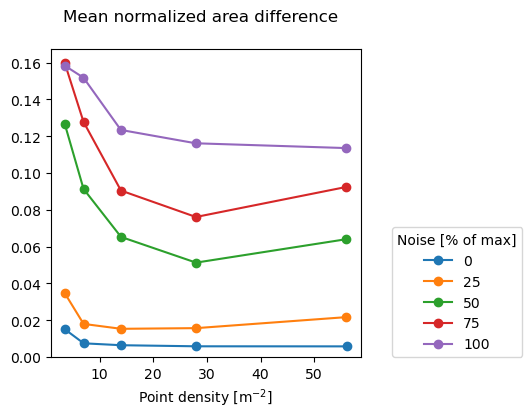

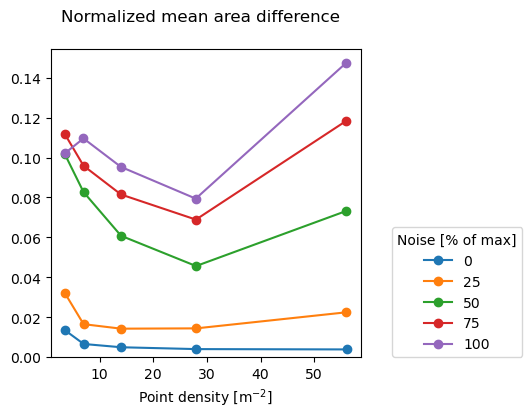

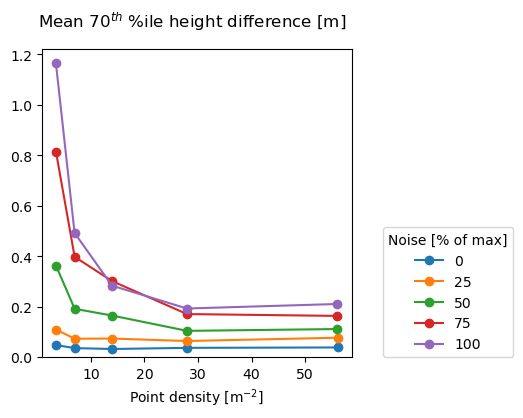

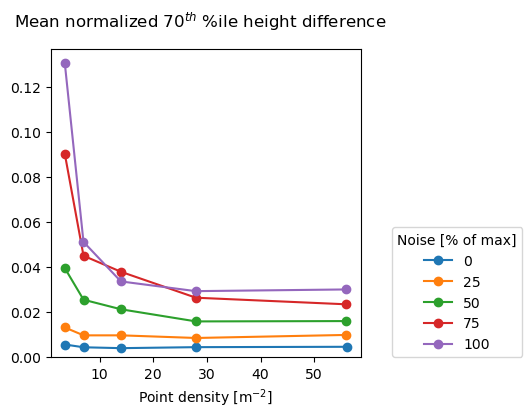

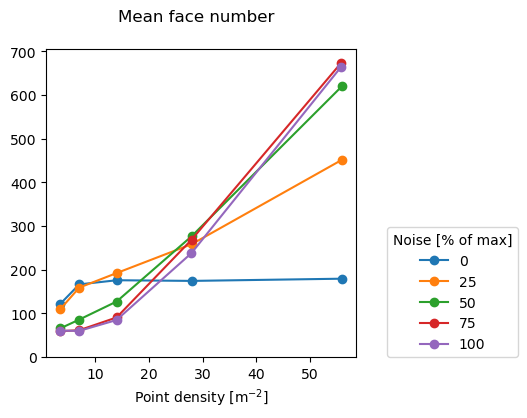

In [22]:
xs = ["density_overall"]
ys = ["iou_22_mean", "hausdorff_22_rms", "volume_22_mean_abs_diff", "volume_22_mean_norm_abs_diff", "volume_22_norm_mean_abs_diff", "area_22_mean_abs_diff", "area_22_mean_norm_abs_diff", "area_22_norm_mean_abs_diff", "h_70p_mean_abs_diff", "h_70p_mean_norm_abs_diff", "n_faces_22_mean"]
# eval_plot_multi(xs, ys)

for y in ys:
    eval_plot_row(xs, y, title=True)

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "n_faces_22_mean", "area_diff_22_mean_abs")

## Graphical evaluation: Manual evaluation results

In [ ]:
e.setup()
e.run_steps(Scenario.setup_evaluation)
# e.setup_input_evaluation()

In [ ]:
for name, s in e.scenarios.items():
    print(get_config_item(s.config, "pulse_freq_hz"))
    print(get_config_item(s.config, "std_horizontal_error"))

In [ ]:
# Accessing individual evaluators' results
e.scenarios["scenario_024"].evaluators["hausdorff"].results["hausdorff.22"].mean()

In [ ]:
e.scenarios["scenario_000"].evaluators["hausdorff"].results

In [ ]:
# Accessing input evaluators' results
e.input_evaluators["area_volume"].results

In [ ]:
# todo: remove
# # Computing area or volume difference between input and reconstructed models
# area_volume_df = pd.merge(
#     e.input_evaluators["area_volume"].results,
#     e.scenarios["scenario_024"].evaluators["area_volume"].results,
#     left_on="identificatie",
#     right_on="identificatie",
#     suffixes=("_in", "_out")
# )
# 
# (area_volume_df["fme_area_22_in"] - area_volume_df["fme_area_22_out"]).mean()
# # (e.input_evaluators["area_volume"].results["fme_area_22"] - e.scenarios["scenario_024"].evaluators["area_volume"].results["fme_area_22"])

In [ ]:
rows = []

for name, s in e.scenarios.items():
    # todo: remove
    # area_volume_df = pd.merge(
    #     e.input_evaluators["area_volume"].results,
    #     s.evaluators["area_volume"].results,
    #     left_on="identificatie",
    #     right_on="identificatie",
    #     suffixes=("_in", "_out")
    # )
    # area_volume_df = pd.merge(
    #     s.evaluators["area_volume_diff"].area_volume_evaluator_1.results,
    #     s.evaluators["area_volume_diff"].area_volume_evaluator_2.results,
    #     left_on="identificatie",
    #     right_on="identificatie",
    #     suffixes=("_in", "_out")
    # )
    
    cols = {
        "name": name,
        "pulse_freq_hz": get_config_item(s.config, "pulse_freq_hz"),
        "density_overall": s.evaluators["point_density"].results.loc["overall", "density"],
        "density_buildings": s.evaluators["point_density"].results.loc["buildings", "density"],
        "point_spacing_along": point_spacing_along(velocity, get_config_item(s.config, "scan_freq_hz")),
        "point_spacing_across": point_spacing_across(altitude, scan_angle_deg, get_config_item(s.config, "pulse_freq_hz"), get_config_item(s.config, "scan_freq_hz")),
        "std_horizontal_error": get_config_item(s.config, "std_horizontal_error"),
        "std_vertical_error": get_config_item(s.config, "std_vertical_error"),
        "std_fraction_of_max": get_config_item(s.config, "std_horizontal_error") / std_horizontal_max,
        "point_mesh_distance_rms": s.evaluators["point_mesh_distance"].results.loc["buildings", "RMS"],
        "point_mesh_distance_mean": s.evaluators["point_mesh_distance"].results.loc["buildings", "mean"],
        "hausdorff_rms": rms(s.evaluators["hausdorff"].results["hausdorff.22"]),
        "hausdorff_mean": s.evaluators["hausdorff"].results["hausdorff.22"].mean(),
        "iou_rms": rms(e.scenarios[name].evaluators["iou_3d"].results["IOU_22"]),
        "iou_mean": e.scenarios[name].evaluators["iou_3d"].results["IOU_22"].mean(),
        "area_mean": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_out"].mean(),
        "volume_mean": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_out"].mean(),
        "area_mean_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].mean(),
        "area_median_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].median(),
        "area_mean_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].abs().mean(),
        "area_median_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].abs().median(),
        "area_rms_diff": rms(e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"]),
        "volume_mean_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].mean(),
        "volume_median_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].median(),
        "volume_mean_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].abs().mean(),
        "volume_median_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].abs().median(),
        "volume_rms_diff": rms(e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"]),
        # todo: remove - this is now handled by AreaVolumeDifferenceEvaluator
        # "area_mean_2": e.scenarios[name].evaluators["area_volume_diff"].area_volume_evaluator_2.results["fme_area_22"].mean(),
        # "volume_mean_2": e.scenarios[name].evaluators["area_volume_diff"].area_volume_evaluator_2.results["fme_volume_22"].mean(),
        # "area_mean_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).mean(),
        # "area_mean_abs_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).abs().mean(),
        # "area_median_abs_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).abs().median(),
        # "area_rms_diff_2": rms(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]),
        # "volume_mean_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).mean(),
        # "volume_mean_abs_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).abs().mean(),
        # "volume_median_abs_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).abs().median(),
        # "volume_rms_diff_2": rms(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]),
    }
    rows.append(cols)

eval_results = pd.DataFrame(rows).set_index("name")

In [ ]:
eval_results

In [ ]:
eval_results[eval_results.std_fraction_of_max == 0.5]

In [ ]:
eval_results[eval_results.pulse_freq_hz == 250000]

In [ ]:
list(eval_results.columns)

### Scatter plots

In [ ]:
fig, ax = plt.subplots() 
for name, group in eval_results.groupby("pulse_freq_hz"):
    ax.plot(group.std_fraction_of_max, group.point_mesh_distance_rms, marker="o", label=str(name))
ax.legend()
plt.show()

In [ ]:
def eval_plot(ax, x, y, error_steps=error_steps):
    for i, fraction in enumerate(error_steps):
        slice = eval_results[eval_results.std_fraction_of_max == fraction]
        ax.plot(slice[x], slice[y], label=str(fraction), marker="o")
    
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    if y in ["hausdorff_rms", "hausdorff_mean", "area_mean_abs_diff", "volume_mean_abs_diff"]:
        ax.set_ylim(bottom=0)
    
    if x in ["point_spacing_along", "point_spacing_across"]:
        ax.xaxis.set_inverted(True)

In [ ]:
def eval_plot_multi(xs, ys):
    fig, axs = plt.subplots(nrows=len(ys), ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4*len(ys)))

    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            eval_plot(axs[i,j], x, y)

In [ ]:
xs = ["density_buildings", "point_spacing_along"]
ys = ["area_mean_abs_diff", "area_median_abs_diff", "area_rms_diff", "volume_mean_abs_diff", "volume_median_abs_diff", "volume_rms_diff"]

eval_plot_multi(xs, ys)

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "pulse_freq_hz", "area_mean_abs_diff")

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "pulse_freq_hz", "point_spacing_across")

In [ ]:
xs = ["density_buildings", "point_spacing_along"]
# y = "iou_mean"
ys = ["iou_mean", "hausdorff_rms", "area_mean_abs_diff", "area_median_abs_diff", "volume_mean_abs_diff", "volume_median_abs_diff"]

eval_plot_multi(xs, ys)

### Histograms

In [ ]:
# Trying to identify the building in scenario_024 that has the extreme area_abs_diff of over 1000 m².
# Turns out: NL.IMBAG.Pand.0503100000028983
name = "scenario_024"
area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
area_volume_df["area_diff"] = area_volume_df.fme_area_22_out - area_volume_df.fme_area_22_in
area_volume_df["area_abs_diff"] = (area_volume_df.fme_area_22_out - area_volume_df.fme_area_22_in).abs()
area_volume_df["volume_diff"] = area_volume_df.fme_volume_22_out - area_volume_df.fme_volume_22_in
area_volume_df["volume_abs_diff"] = (area_volume_df.fme_volume_22_out - area_volume_df.fme_volume_22_in).abs()
area_volume_df

In [ ]:
# Relation of area and volume difference
plt.scatter(area_volume_df.area_diff, area_volume_df.volume_diff)
plt.show()

In [ ]:
# Relation of area and volume difference
plt.scatter(eval_results.area_diff, area_volume_df.volume_diff)
plt.show()

In [ ]:
scenario_names = [f"scenario_{i:03}" for i in range(25)]

iou_22 = [e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names]
hausdorff_22 = [e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names]

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

In [ ]:
def hist_grid(data, names, shape=(5, 5), title=None, bins=30):
    n_rows, n_cols = shape
    names_layout = np.array(names).reshape(shape, order="F")
    
    # Function to get 1-dim list position from row and column
    def iloc(row, col):
        return row + n_rows * col
    
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="col", figsize=(5*n_cols, 3*n_rows))
    
    for col in range(n_cols):
        # Get identical bins for all data series in this column
        bins_np = np.histogram(
            pd.concat(
                data[iloc(0, col) : iloc(n_rows, col)]
            ).dropna(),
            bins=bins
        )[1]  # get the bin boundaries
        
        for row in range(n_rows):
            axs[row, col].hist(data[iloc(row, col)], bins=bins_np)
            axs[row, col].set_title(names_layout[row, col])
    
    if title is not None:
        fig.suptitle(title)
    plt.show()

titles = [f"{name} – D: {eval_results.density_buildings[name]:.1f}, A: {eval_results.std_fraction_of_max[name]}" for name in scenario_names]

hist_grid(area_diffs, titles, bins=25)

In [ ]:
np.array(scenario_names).reshape((5, 5), order="F")

In [ ]:
scenario_names = [f"scenario_{2+5*i:03}" for i in range(5)]
scenario_names = [f"scenario_{5+i:03}" for i in range(5)]

def hist_multi(data, names, title=None, bins=30):
    bins_np = np.histogram(pd.concat(data).dropna(), bins=bins)[1]  # get the bin boundaries
    fig, axs = plt.subplots(len(data), 1, sharex=True, sharey=False, figsize=(5, 3*len(data)))
    for i, series in enumerate(data):
        axs[i].hist(series, bins=bins_np)
        axs[i].set_title(names[i])
    if title is not None:
        fig.suptitle(title)
    plt.show()

iou_22 = [e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names]
hausdorff_22 = [e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names]

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

hist_multi(area_diffs, scenario_names, bins=25)

In [ ]:
scenario_names = [f"scenario_{2+5*i:03}" for i in range(5)]
scenario_names = [f"scenario_{5+i:03}" for i in range(5)]

plt.hist([e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names], label=scenario_names)
plt.title("IOU")
plt.legend()
plt.show()

plt.hist([e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names], label=scenario_names)
plt.title("Hausdorff distance")
plt.legend()
plt.show()

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

plt.hist(volume_diffs, label=scenario_names)
plt.title("Volume difference")
plt.legend()
plt.show()

plt.hist(volume_abs_diffs, label=scenario_names)
plt.title("Volume difference (absolute value)")
plt.legend()
plt.show()

plt.hist(area_diffs, label=scenario_names)
plt.title("Area difference")
plt.legend()
plt.show()

plt.hist(area_abs_diffs, label=scenario_names)
plt.title("Area difference (absolute value)")
plt.legend()
plt.show()